## 1.Packages

### 1.1.Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install -U imbalanced-learn

### 1.2.Import

In [1]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE # Implementation of SMOTE - Synthetic Minority Over-sampling Technique
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot_confusion_matrix

## 2.Data

### 2.1.Load Data

In [83]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
df = pd.DataFrame(pd.read_spss("../data/secom_mod.sav"))
df = df.set_index('ID')
df.shape 

(1567, 592)

In [84]:
# have a look at the first five rows of dataset
df.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### 2.2.Drop timestamp

In [85]:
# removing the "timestamp" feature
df = df.drop(columns='timestamp')

### 2.3.Change 0 to pass, 1 to fail

In [86]:
# change 0 to pass and 1 to fail in the target variable
dict_temp = {0:'pass' ,1:'fail'}
df['class'] = df['class'].map(dict_temp)

### 2.4.Pass / Fail Ratio

In [87]:
# number of pass and fail values
df['class'].value_counts()

pass    1472
fail      95
Name: class, dtype: int64

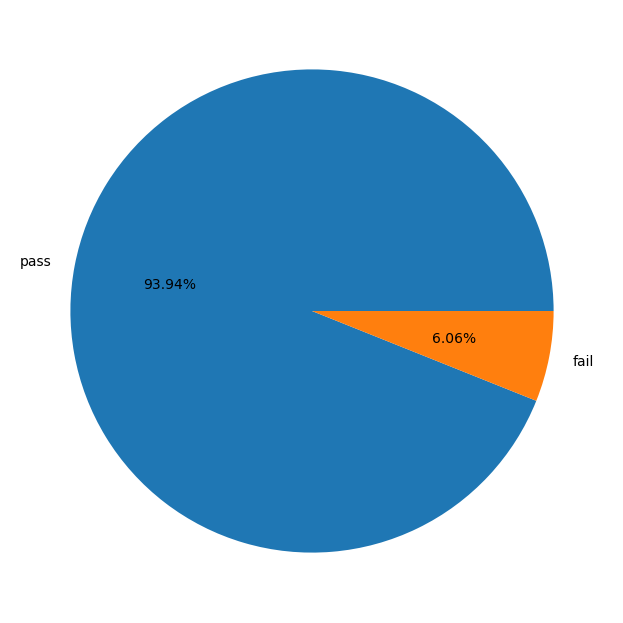

In [88]:
# pie chart of the target variable
fig = plt.pie(df['class'].value_counts(),labels=['pass','fail'], autopct="%.2f%%")

### 2.5.Univariate Analysis

In [89]:
# a summary of statistics pertaining to the DataFrame columns
df.describe()

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


### 2.6.Correlation

[Text(0.5, 1.0, 'Frequency Histogram of Correlation'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Correlation coefficient')]

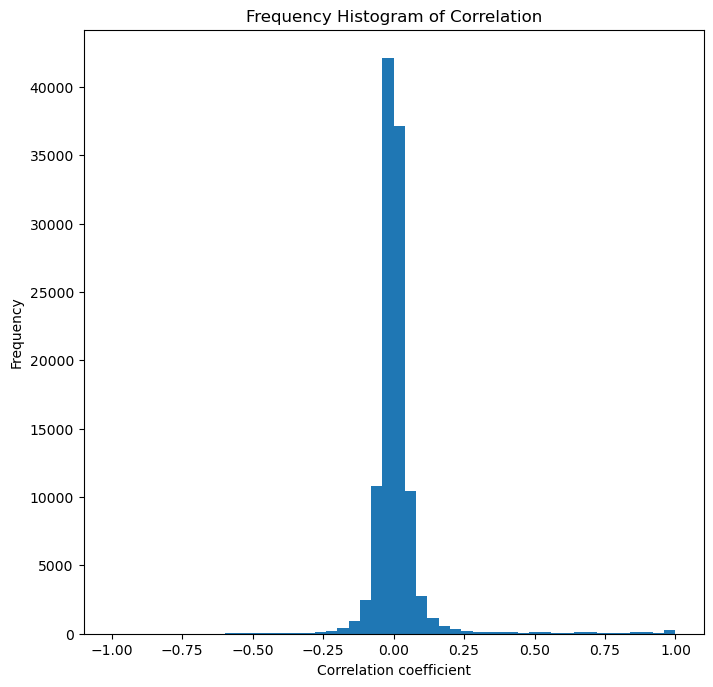

In [90]:
# Correlation Matrix
cor_matrix = pd.DataFrame(df.corr())

# Remove reuntant values by selecting only the upper correlation triangle
upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))

# Convert the upper correlation triangle to a Series
corlist = pd.Series(upper_tri.values.ravel('F'))

# Correlation Histogram
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(corlist, bins =50)
plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient')

### 2.7.Check duplicated

In [91]:
# duplicated rows
df.duplicated(df.columns[1:591]).sum()

0

### 2.8.Splitting Traninig and Test Data 

In [92]:
# defining the target variable to get the same proportion defaults in both train and test dataset
y = df['class']
x = df.drop('class', axis=1)

In [93]:
# spliting the dataset with the proportion of 20% for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=40, shuffle=True, stratify=y)

## 3.Feature Removal

### 3.1.Constant

In [20]:
# getting the number of rows of the x_train and x_test
print(x_train.shape)
print(x_test.shape)

(1253, 590)
(314, 590)


In [21]:
# number of features with only one value and and missing value (100% constant, 0 variance)
print(len(x_train[x_train.columns[x_train.nunique() == 1]].columns))
print(len(x_test[x_test.columns[x_test.nunique() == 1]].columns))

116
122


In [22]:
# dropping the constant features from the x_train
x_train.drop(list(x_train[x_train.columns[x_train.nunique() == 1]].columns), axis = 1, inplace = True)
x_test.drop(list(x_test[x_test.columns[x_test.nunique() == 1]].columns), axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
# getting the number of rows of the x_train
print(x_train.shape)
print(x_test.shape)

(1253, 474)
(314, 468)


### 3.2.With more than a percentage of Na

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

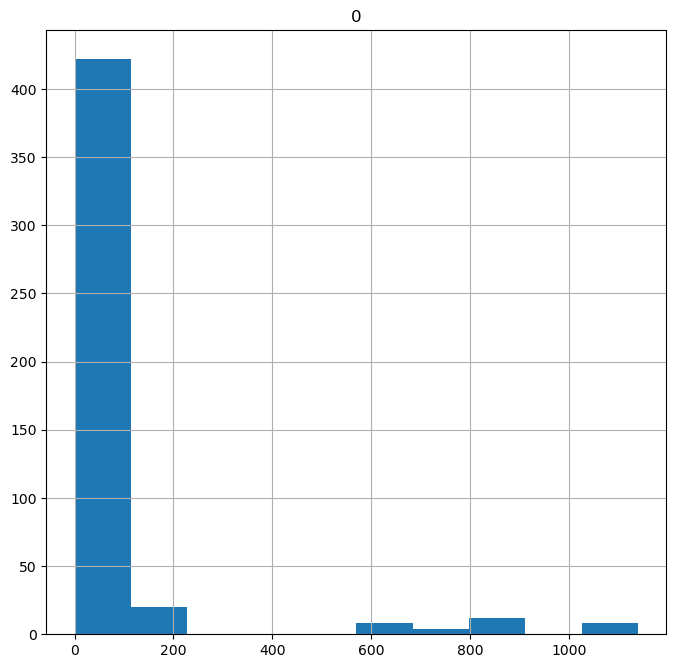

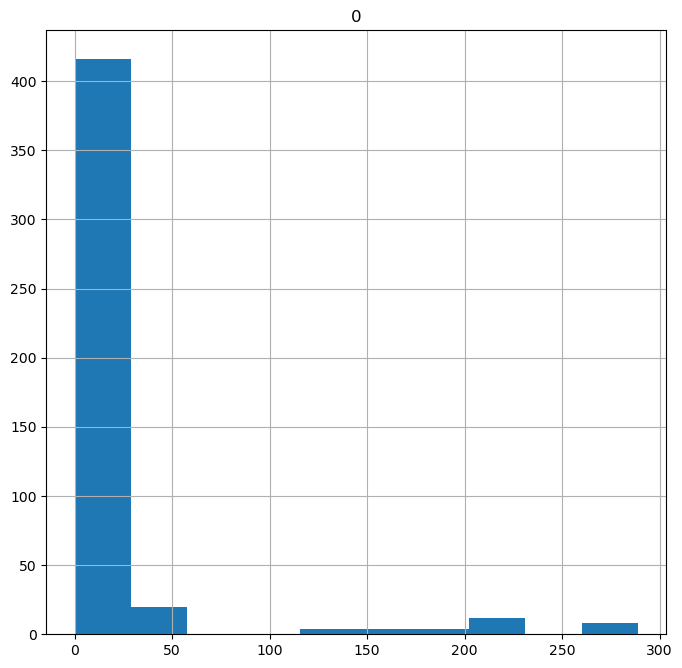

In [25]:
# counting number of missing values in each features
feature_train_na_sum = pd.DataFrame((x_train.isna()).sum())
feature_test_na_sum = pd.DataFrame((x_test.isna()).sum())
# histogram of number of missing values in features
feature_train_na_sum.hist()
feature_test_na_sum.hist()

In [26]:
# selecting features containing more than a percentage of missing values
percentage_missing_remove = 55/100
feature_train_na_r = feature_train_na_sum[feature_train_na_sum[0]>=(len(x_train.loc[:,])*percentage_missing_remove)].index
feature_test_na_r = feature_test_na_sum[feature_test_na_sum[0]>=(len(x_test.loc[:,])*percentage_missing_remove)].index
# number of features containing more than 55% missing values
print(len(feature_train_na_r))
print(len(feature_test_na_r))

24
24


In [28]:
# dropping the features containing more than a percentage of missing values from the x_train
x_train.drop(feature_train_na_r, axis = 1, inplace = True)
x_test.drop(feature_test_na_r, axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 3.3.least volatile

In [35]:
# calculationg the standard deviation and the coefficient standard deviation of each features
summary_train = x_train.describe(include='all')
summary_test = x_test.describe(include='all')
feature_train_std = pd.DataFrame(summary_train.loc['std',:])
feature_test_std = pd.DataFrame(summary_test.loc['std',:])
feature_train_coeffstd = pd.DataFrame(summary_train.loc['std',:]/abs(summary_train.loc['mean',:]))
feature_test_coeffstd = pd.DataFrame(summary_test.loc['std',:]/abs(summary_test.loc['mean',:]))

In [36]:
# the min and max of the standard deviation of features
print("Min train Std.",min(feature_train_std.iloc[:,0]))
print("Max train Std.",max(feature_train_std.iloc[:,0]))
print("Min test Std.",min(feature_test_std.iloc[:,0]))
print("Max test Std.",max(feature_test_std.iloc[:,0]))

Min train Std. 0.0001055328779148529
Max train Std. 6438.937158652618
Min test Std. 9.980547205484738e-05
Max test Std. 6991.80372847735


In [37]:
# the min and max of the coefficient standard deviation of features
print("Min train Coef. Std.", min(feature_train_coeffstd.iloc[:,0]))
print("Max train Coef. Std.", max(feature_train_coeffstd.iloc[:,0]))
print("Min train Coef. Std.", min(feature_test_coeffstd.iloc[:,0]))
print("Max train Coef. Std.", max(feature_test_coeffstd.iloc[:,0]))

Min train Coef. Std. 0.0023114813081706598
Max train Coef. Std. 709.586291505058
Min train Coef. Std. 0.0020203410078248473
Max train Coef. Std. 104.6993723618092


In [38]:
# sorting features based on the coefficient standard deviation
feature_train_coeffstd_sort = feature_train_coeffstd.sort_values(by=[0])
feature_test_coeffstd_sort = feature_test_coeffstd.sort_values(by=[0])

<AxesSubplot:>

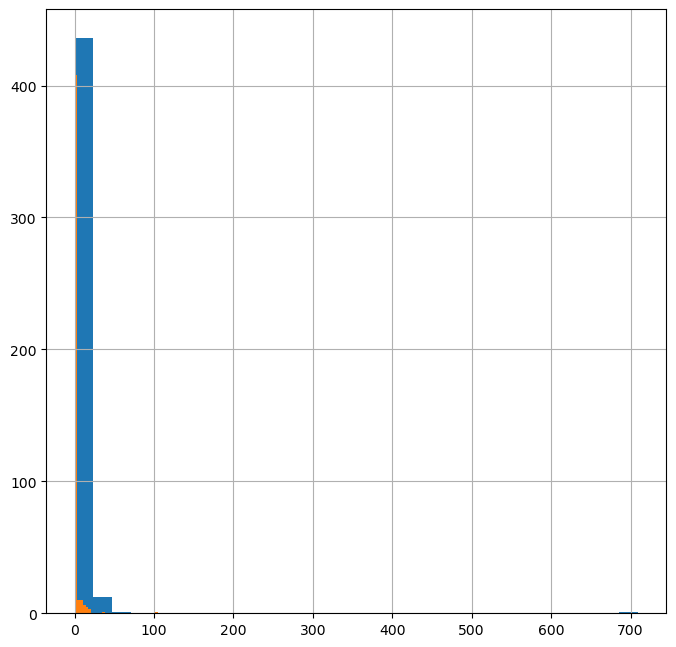

In [39]:
# histogram of the coefficient standard deviation of features
feature_train_coeffstd_sort.iloc[:,0].hist(bins=30)
feature_test_coeffstd_sort.iloc[:,0].hist(bins=30)

<AxesSubplot:>

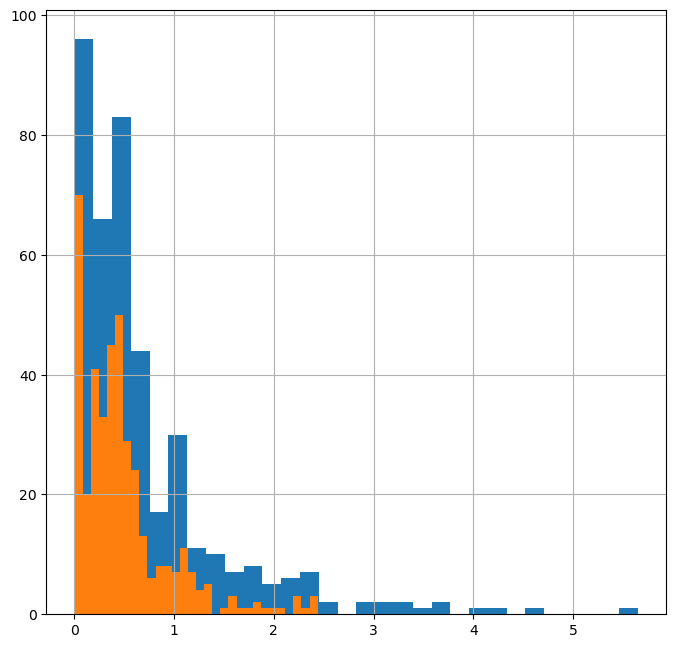

In [42]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
percentage_features_train = int(len(feature_train_coeffstd_sort)*90/100)
percentage_features_test = int(len(feature_test_coeffstd_sort)*90/100)
feature_train_coeffstd_sort.iloc[0:percentage_features_train,0].hist(bins=30)
feature_test_coeffstd_sort.iloc[0:percentage_features_test,0].hist(bins=30)

In [43]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 5

percentage_features_train_rm = int(len(feature_train_coeffstd_sort)*percentageToAnalyze/100)
percentage_features_test_rm = int(len(feature_train_coeffstd_sort)*percentageToAnalyze/100)
feature_train_index = feature_train_coeffstd_sort.index
feature_test_index = feature_test_coeffstd_sort.index
feature_train_least_volatiles = feature_train_index[0:percentage_features_train_rm+1]
feature_test_least_volatiles = feature_test_index[0:percentage_features_test_rm+1]
print("Least Volatiles train", len(feature_train_least_volatiles))
print("Least Volatiles test", len(feature_test_least_volatiles))

Least Volatiles train 23
Least Volatiles test 23


In [44]:
# dropping a percentage of features with the least coeffstd
x_train.drop(feature_train_least_volatiles, axis = 1, inplace = True)
x_test.drop(feature_test_least_volatiles, axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 4.Outlier Identification

In [46]:
# calculating the z score of the values
z_x_train = pd.DataFrame(stats.zscore(x_train,nan_policy='omit'))
z_x_train

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,0.122233,-0.137249,0.086025,-0.057430,0.814147,-0.020251,1.345737,-0.145969,0.083656,-0.747087,...,0.154118,-0.264419,0.063091,0.054366,0.053153,0.053074,-0.256815,-0.425326,-0.553038,-0.318940
1,-0.820960,-1.379534,0.101249,-0.033167,-0.570777,0.183135,-1.416011,-0.119892,-0.511804,-0.137567,...,2.551147,4.719447,5.854373,0.175189,0.053153,0.172917,-0.628903,1.951141,2.033549,1.458167
2,0.102402,-0.684294,1.463540,-0.051823,-0.913176,0.375816,0.967340,-0.504525,-1.011565,-0.478078,...,0.075405,-0.242386,-0.002108,-0.166269,-0.188836,-0.173306,1.746129,0.446444,0.794901,-0.561183
3,1.078329,-0.203744,2.468494,-0.050403,-2.023770,0.022567,-1.479985,0.910142,-0.416105,-0.209511,...,-0.162219,-0.243865,-0.190608,-0.034939,-0.067842,-0.033602,-0.209314,-0.150659,-0.261592,-0.214194
4,-0.049862,NaN,-0.548534,-0.050500,0.206569,0.097498,-1.063477,-0.028623,-0.043943,-0.518565,...,0.354613,-0.236076,0.515428,-0.092724,-0.116240,-0.092074,0.281526,-0.067064,-0.225161,-0.385468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-0.838890,-0.520650,-0.150441,-0.052136,0.645995,0.343702,-0.196432,-1.482404,0.923680,1.106055,...,0.381345,-0.231513,-0.002336,0.001834,-0.116240,0.006195,0.289443,-1.249326,-1.245223,-0.802710
1249,-1.813187,-0.072854,2.187048,-0.052754,-2.546011,-0.138001,2.027666,3.191861,0.455818,-0.541730,...,-0.269150,-0.232421,-0.162124,-0.197788,-0.237234,-0.194325,1.437375,0.470328,0.867763,-0.507551
1250,-0.615180,-0.545370,-0.211335,-0.054830,-0.683406,-0.159410,-0.870195,-0.647947,-1.490060,-0.913816,...,0.581840,-0.250955,0.130227,-0.113737,-0.067842,-0.107726,-0.391400,1.760068,1.159209,0.909474
1251,-0.756306,-0.205969,-0.466076,-0.054908,0.219860,-0.277159,0.349384,-0.315468,-0.394839,-0.270124,...,-1.072615,-0.258033,-0.812900,-0.019179,-0.019444,-0.022890,-1.982671,-0.831355,-0.808054,1.825528


In [47]:
z_x_test = pd.DataFrame(stats.zscore(x_test,nan_policy='omit'))
z_x_test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,420
0,-1.042187,0.099805,0.272182,0.375242,-0.061924,0.831319,0.034450,0.143380,0.769902,-0.596440,...,0.099937,-0.209209,0.205330,-1.207982,-1.722641,-1.213190,0.043157,-0.623698,-0.590274,-0.569186
1,0.408239,0.616236,1.654054,1.080207,-0.059560,-0.917222,-0.131984,0.140730,0.734460,0.025356,...,-0.737748,-0.187930,-0.242687,-0.478888,-0.440106,-0.457962,0.751658,-0.691644,-0.681383,-0.754189
2,0.550042,0.074757,-0.946245,-1.153533,-0.057888,0.983817,-0.034898,0.344847,-0.293367,-1.026044,...,0.143116,-0.239580,0.065003,0.072859,0.201162,0.076731,-0.772965,-0.507218,-0.468795,-0.023090
3,-1.603278,0.652019,NaN,NaN,NaN,NaN,-16.914125,-0.292689,1.712668,0.341906,...,-0.380797,-0.225688,-0.275045,0.269912,0.308040,0.245253,-0.360420,1.327336,0.867470,0.929390
4,-0.876704,-0.708131,-0.016661,-0.882902,-0.065811,0.583386,-0.007158,0.686811,0.351683,-2.371384,...,-0.999705,-0.233238,-1.016025,-0.557709,-0.333228,-0.572093,0.105935,-0.342205,-0.316947,-0.442690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-0.367327,1.418549,0.665397,0.285247,-0.056607,1.375611,-0.118115,1.240845,-0.576906,2.229905,...,-0.412462,-0.209866,-0.526548,0.210796,0.308040,0.178875,-0.216926,2.171814,1.839299,1.283256
310,-0.900384,0.011881,-0.951679,0.050599,-0.061765,1.505623,0.353450,-0.814913,0.330417,0.115799,...,-0.267090,-0.232536,-0.495231,0.742837,0.735552,0.783513,1.119362,0.414912,0.837100,-0.417357
311,0.750772,0.055843,0.850951,3.578162,-0.050508,-0.974269,0.395058,1.040704,-0.520198,1.110672,...,-0.493064,-0.182429,-0.502850,-0.281835,-0.012594,-0.277155,0.114904,-0.613991,-0.620644,-0.585185
312,-0.766609,1.025060,-1.002418,0.935218,-0.056188,-0.256223,0.783405,-0.162796,-0.087802,0.975008,...,0.235233,-0.227465,0.405380,-0.124193,-0.333228,-0.133995,-1.337973,-0.041300,0.138598,2.100443


In [48]:
# calculating the number of outliers
print(sum(z_x_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))
print(sum(z_x_test.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

4724
1401


## 5.Imputation outliers and missing values

### 5.1.Replacing Outliers with NA

In [49]:
# number of na values before replacing outliers with na
print(x_train.isna().sum().sum())
print(x_test.isna().sum().sum())

10888
2782


In [50]:
# replacing outliers with NA to impute all NA values
is_outlier_train = abs(z_x_train)>3
is_outlier_test = abs(z_x_test)>3
is_outlier_train.columns = x_train.columns
is_outlier_test.columns = x_test.columns
is_outlier_train.index = x_train.index
is_outlier_test.index = x_test.index
x_train = x_train.mask(is_outlier_train, np.nan)
x_test = x_test.mask(is_outlier_test, np.nan)

In [51]:
# number of na values after replacing outliers with na
print(x_train.isna().sum().sum())
print(x_test.isna().sum().sum())

15612
4183


### 5.2.Imputation

In [57]:
# KNN
imputer = KNNImputer(n_neighbors=5)

x_train_no_na = x_train.copy(deep=True)
x_test_no_na = x_test.copy(deep=True)
x_train_no_na.iloc[:,:] = imputer.fit_transform(x_train)
x_test_no_na.iloc[:,:] = imputer.fit_transform(x_test)
x_train_no_na_knn = x_train_no_na.iloc[:,:]
x_test_no_na_knn = x_test_no_na.iloc[:,:]

In [60]:
# MICE
imputer = IterativeImputer(max_iter=5, random_state=0)

x_train_no_na = x_train.copy(deep=True)
x_test_no_na = x_test.copy(deep=True)
x_train_no_na.iloc[:,:] = imputer.fit_transform(x_train)
x_test_no_na.iloc[:,:] = imputer.fit_transform(x_test)
x_train_no_na_mice = x_train_no_na.iloc[:,:]
x_test_no_na_mice = x_test_no_na.iloc[:,:]

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [61]:
# Number of na values after Imputation
print(x_train_no_na.isna().sum().sum())
print(x_test_no_na.isna().sum().sum())

0
0


60


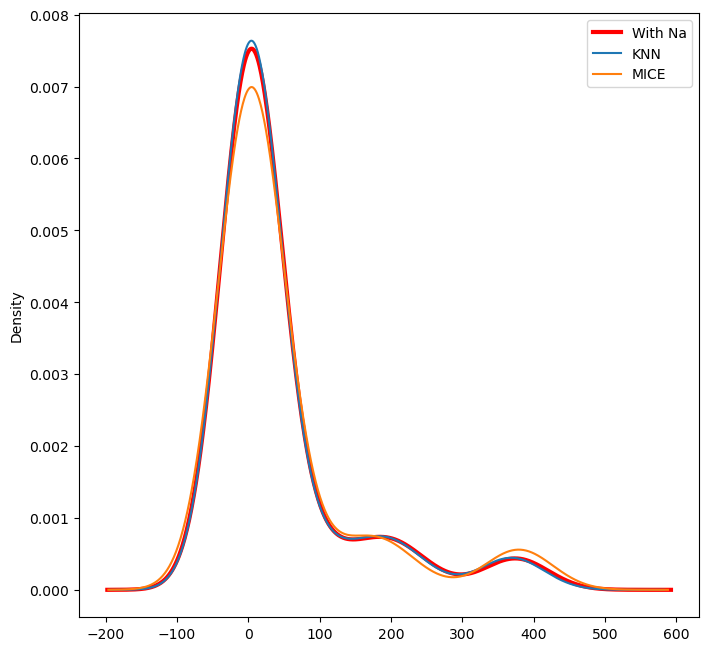

In [62]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((x_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(x_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = x_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = x_train_no_na_knn[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = x_train_no_na_mice[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)

## 6.Feature Selection

### 6.1.BORUTA

In [64]:
# define random forest classifier
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rfc.fit(x_train_no_na, y_train)
# define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
# find all relevant features
feature_selector.fit(x_train_no_na.to_numpy(),y_train)

# check ranking of features
feature_selector.ranking_

# check selected features
feature_selector.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	396
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	24
Rejected: 	396
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	24
Rejected: 	396
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	23
Rejected: 	397
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	23
Rejected: 	397
Iteration: 	16 / 100
Confirmed: 	7
Tentat

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,

In [65]:
# call transform() on x_train_no_na to filter it down to selected features
x_train_filtered = pd.DataFrame(feature_selector.transform(x_train_no_na.to_numpy()))
x_train_filtered.columns = x_train_no_na.columns[feature_selector.support_]
x_train_filtered.index = x_train_no_na.index
x_train_filtered

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
ID,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,69.0667,8.5288,1.4845,18.5155,25.4260,-0.0146,0.455500,0.9649,2.888,0.6627,0.6900,374.0,0.019500,168.1031,13.6996,22.7157,2.3095,62.3288,4.272400
1261.0,2953.63,67.4222,9.0402,1.7273,18.2727,22.1740,-0.0124,0.457334,1.1540,2.627,0.7492,0.2493,227.0,0.042165,100.6525,8.9011,32.6879,3.4184,21.8402,9.250083
1041.0,3021.61,69.4222,8.8581,-3.7509,23.7509,30.7593,-0.0086,0.459972,1.8340,2.658,0.5042,0.9898,225.0,0.051081,97.2193,8.6034,21.7993,3.3690,39.7080,11.145033
1181.0,3093.46,68.1778,8.7782,1.3555,18.6445,22.2300,-0.0107,0.468000,1.0210,2.792,0.7931,0.9841,242.0,0.021000,106.9279,9.2676,36.7423,4.8659,20.4651,4.490400
611.0,3010.40,68.6444,8.5615,2.3900,17.6100,25.5921,-0.0095,0.461583,0.8845,2.748,0.8080,0.7259,418.0,0.046772,204.2392,15.7706,15.0259,2.9332,68.7831,10.007054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,67.4111,8.5862,-3.1227,23.1227,31.4849,-0.0111,0.442000,1.2390,2.511,0.6847,0.4626,1047.0,0.222300,434.9291,38.7634,16.1068,4.6652,45.9459,50.293500
1101.0,2880.58,72.7778,8.9818,0.1982,19.8018,23.4628,-0.0116,0.459626,1.4650,2.920,0.8037,0.4269,447.0,0.054846,206.0362,16.7588,18.7968,2.5177,33.6207,12.048561
1469.0,2968.78,70.3333,8.6384,1.2518,18.7482,24.1495,-0.0112,0.457966,1.3800,2.765,0.7248,0.5995,59.0,0.041752,32.6637,2.6616,31.6738,4.0841,50.7795,9.530262


In [ ]:
# filter test down to selected features
x_test_filtered = x_test_no_na[x_train_filtered.columns]
x_test_filtered

### 6.2.Overview of remaining features

In [66]:
# a summary of statistics pertaining to the DataFrame columns
x_train_filtered.describe()

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3012.629912,69.503621,8.823868,2.737731,20.504465,26.637356,-0.009805,0.462012,1.183260,2.731059,0.746615,0.606008,487.979380,0.046713,217.308537,17.692003,29.056734,5.668814,52.280245,10.096315
std,68.756816,3.469217,0.399677,8.158165,4.925493,8.971380,0.002825,0.005811,0.267029,0.204481,0.080886,0.493604,360.475590,0.037382,159.875601,12.491655,12.250598,2.406721,24.439255,8.059090
min,2816.810000,59.888900,7.603200,-21.205500,6.448200,-208.814491,-0.018500,0.398900,0.605500,2.340000,0.501300,0.154400,28.000000,0.000000,13.622900,1.239100,7.953400,-16.903573,0.000000,0.000000
25%,2967.540000,67.388900,8.578800,-1.890000,17.362700,22.997000,-0.011800,0.459300,0.974400,2.571000,0.688700,0.371800,293.000000,0.025100,130.220300,11.056900,20.363900,4.091100,35.320100,5.429400
50%,3011.483066,69.144400,8.769952,0.853600,20.018200,26.247000,-0.010100,0.461965,1.144000,2.734000,0.758600,0.469700,433.000000,0.042479,193.904600,16.141600,26.311100,5.259700,47.222200,9.261031
75%,3054.810000,72.266700,9.035500,4.381800,22.861800,29.921200,-0.008100,0.465000,1.338000,2.857000,0.818700,0.693900,607.000000,0.049718,268.815900,21.264700,35.748700,6.679000,63.440900,10.815549
max,3232.640000,77.344400,10.963400,29.750900,48.193622,52.602037,-0.000700,0.488500,2.022000,3.463000,0.888400,5.865800,3354.419152,0.265031,1493.357605,119.356000,90.520662,23.100200,160.493800,59.664900


<AxesSubplot:>

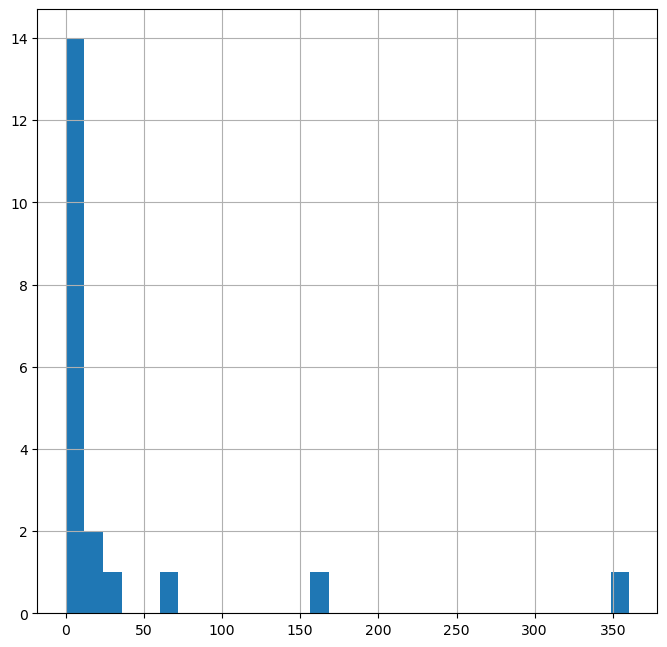

In [67]:
# histogram of the std of the remaing features
summary = x_train_filtered.describe(include='all')
feature_std = pd.DataFrame(summary.loc['std',:])
feature_std_sort = feature_std.sort_values(by=['std'])
feature_std_sort.iloc[:,0].hist(bins=30)

[Text(0.5, 1.0, 'Frequency Histogram of Correlation'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Correlation coefficient')]

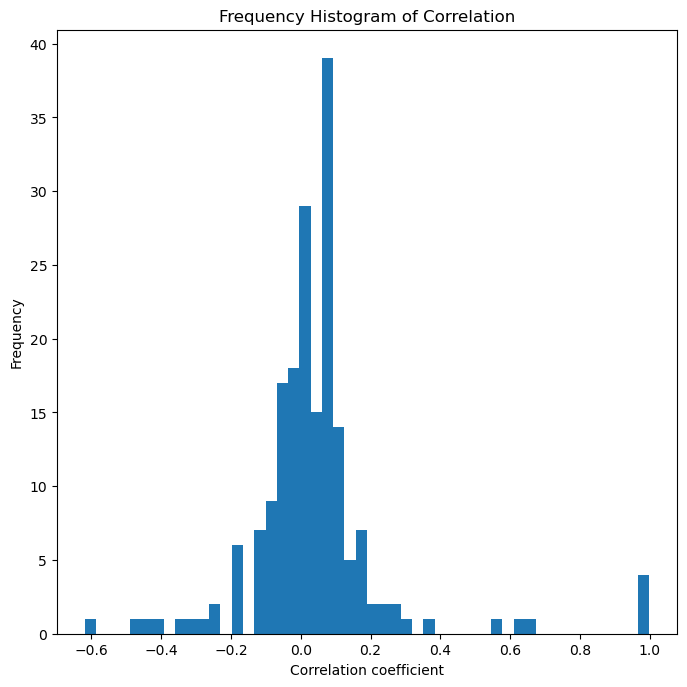

In [68]:
# Correlation Matrix
cor_matrix = pd.DataFrame(x_train_filtered.corr())

# Remove reuntant values by selecting only the upper correlation triangle
upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))

# Convert the upper correlation triangle to a Series
corlist = pd.Series(upper_tri.values.ravel('F'))

# Correlation Histogram
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(corlist, bins =50)
plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient')

In [69]:
# Correlation of the remaining features
corr = pd.DataFrame(x_train_filtered.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
feature001,1.00,0.03,-0.04,-0.09,-0.03,-0.00,-0.06,-0.06,0.02,0.00,0.02,-0.06,0.03,-0.04,0.03,0.03,0.01,0.00,-0.05,-0.03
feature029,0.03,1.00,-0.40,-0.29,-0.13,-0.13,-0.36,-0.17,0.18,0.07,-0.05,-0.18,-0.11,-0.18,-0.12,-0.09,-0.05,-0.11,-0.30,-0.18
feature034,-0.04,-0.40,1.00,0.15,0.08,0.08,0.13,0.16,-0.10,-0.00,0.03,0.02,0.03,0.08,0.03,0.02,0.07,0.08,0.08,0.08
feature060,-0.09,-0.29,0.15,1.00,-0.45,-0.26,0.35,0.18,-0.18,-0.01,0.05,0.19,0.07,0.24,0.07,0.05,0.07,0.21,0.29,0.23
feature065,-0.03,-0.13,0.08,-0.45,1.00,0.55,0.13,0.12,0.00,0.00,0.01,-0.04,-0.02,0.10,-0.02,-0.01,0.07,-0.07,0.09,0.08
feature066,-0.00,-0.13,0.08,-0.26,0.55,1.00,0.10,0.09,-0.04,0.02,0.03,-0.02,-0.01,-0.05,-0.01,-0.01,-0.00,0.19,0.11,0.08
feature104,-0.06,-0.36,0.13,0.35,0.13,0.10,1.00,0.16,-0.24,0.00,0.07,0.09,0.11,0.28,0.12,0.10,0.03,0.14,0.63,0.27
feature113,-0.06,-0.17,0.16,0.18,0.12,0.09,0.16,1.00,-0.04,-0.02,0.00,0.11,0.09,-0.06,0.09,0.07,0.08,0.08,0.16,-0.09
feature126,0.02,0.18,-0.10,-0.18,0.00,-0.04,-0.24,-0.04,1.00,-0.49,-0.62,-0.07,-0.06,-0.11,-0.06,-0.06,0.09,-0.07,-0.19,-0.11
feature127,0.00,0.07,-0.00,-0.01,0.00,0.02,0.00,-0.02,-0.49,1.00,0.65,-0.01,-0.01,0.00,-0.01,-0.00,-0.09,-0.06,0.01,0.01


## 7.Modeling

### 7.1.Balancing

In [79]:
# transform the dataset
oversample = SMOTE()
x_balance , y_balance = oversample.fit_resample(x_train_filtered, y_train)

In [80]:
# summarize the new class distribution
counter = Counter(y_balance)
print(counter)

Counter({'pass': 1177, 'fail': 1177})


### 7.2.Scaling

### 7.3.Model Building


In [106]:
# define random forest classifier
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# fit the model
rfc.fit(x_balance, y_balance)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [108]:
# calculate predicted y of the test
y_pred = rfc.predict(x_test_filtered)

## 8.Evaluation

In [109]:
# calculate accuracy
accuracy_score(y_test, y_pred)

0.7802547770700637

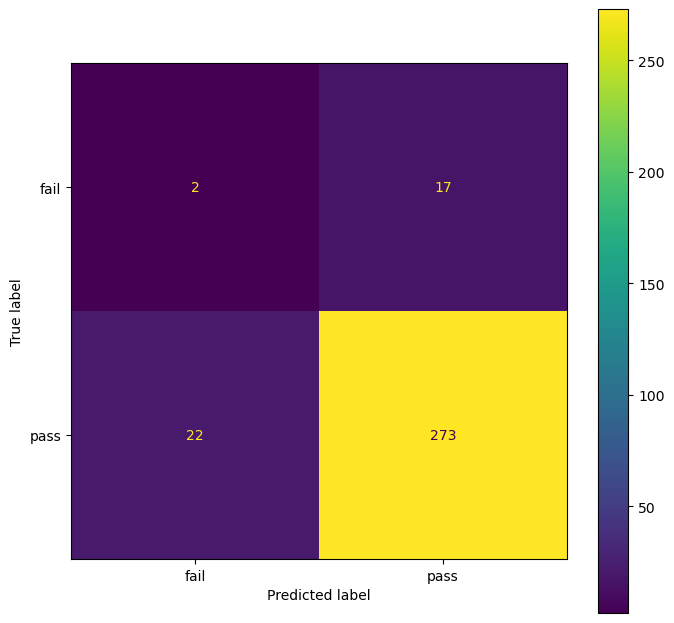

In [105]:
# plot confusion matrix
plot_confusion_matrix(rfc, x_test_filtered, y_test)